Model-Polynomial Regression(for curvilinear relationship)
polynomial feature class adds the polynomial term to the model
first col is bias 2,3,4 are input features and rest are their association
Fit: Calculate the mean and standard deviation of x_train (or other required statistics depending on the transformer).
Transform: Use the calculated parameters to standardize x_train.

In [2]:
import pandas as pd

df = pd.read_csv("../Reports/50_Startups.csv")

In [3]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)
model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)

LinearRegression()

In [7]:
y_train_predict = model_poly.predict(x_poly_train)
y_test_predict = model_poly.predict(x_poly_test)

MAE:


In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
print(
    "mean absolute error for test data: ", mean_absolute_error(y_test, y_test_predict)
)
print(
    "mean absolute error for training data",
    mean_absolute_error(y_train, y_train_predict),
)

mean absolute error for test data:  8209.075128117818
mean absolute error for training data 6249.916567961464


In [10]:
import numpy as np

MSE:


In [11]:
mse_test = np.mean((y_test - y_test_predict) ** 2)
print("Mean Squared Error of test data: ", mse_test)
mse_train = np.mean((y_train - y_train_predict) ** 2)
print("Mean Squared Error of train data: ", mse_train)

Mean Squared Error of test data:  89144211.21570645
Mean Squared Error of train data:  76890940.91726905


RMSE:


In [12]:
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error of train data: ", rmse_train)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error of test data: ", rmse_test)

Root Mean Squared Error of train data:  8768.747967484815
Root Mean Squared Error of test data:  9441.621217550854


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2 Score:


In [14]:
r2_score_test = r2_score(y_test, y_test_predict)
print("R2 Score of test data: ", r2_score_test)
r2_score_train = r2_score(y_train, y_train_predict)
print("R2 Score of train data: ", r2_score_train)

R2 Score of test data:  0.9076462437978527
R2 Score of train data:  0.9584395236488612


Adjusted R2 Score:


In [15]:
adj_r2_test = 1 - (
    (1 - r2_score(y_test, y_test_predict))
    * (len(x_test) - 1)
    / (len(x_test) - x_test.shape[1] - 1)
)
print("Adjusted R2 Score of test data: ", adj_r2_test)
adj_r2_train = 1 - (
    (1 - r2_score(y_train, y_train_predict))
    * (len(x_train) - 1)
    / (len(x_train) - x_train.shape[1] - 1)
)
print("Adjusted R2 Score of train data: ", adj_r2_train)

Adjusted R2 Score of test data:  0.8824588557427216
Adjusted R2 Score of train data:  0.9544175420664929


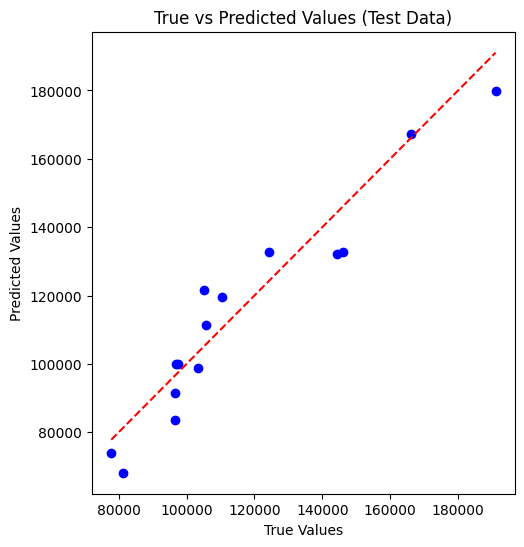

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_predict, color="blue")
plt.title("True vs Predicted Values (Test Data)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--"
)

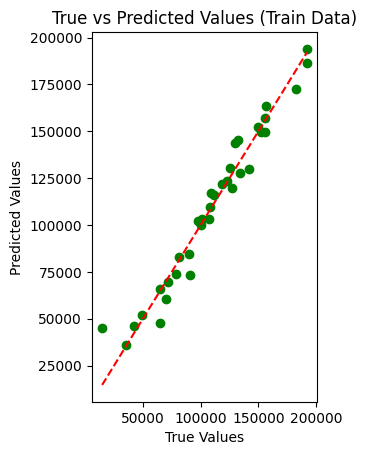

In [18]:
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_predict, color="green")
plt.title("True vs Predicted Values (Train Data)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot(
    [min(y_train), max(y_train)],
    [min(y_train), max(y_train)],
    color="red",
    linestyle="--",
)